In [5]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [6]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(12,12))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [7]:
IT = nx.Graph()
TE = nx.Graph()

df = pd.read_csv('data.csv')

importer_taxon_edges = nx.from_pandas_edgelist(df, source='Importer', target='Taxon', create_using=nx.Graph())
taxon_exporter_edges = nx.from_pandas_edgelist(df, source='Exporter', target='Taxon', create_using=nx.Graph())

print(importer_taxon_edges)

Graph with 2001 nodes and 13825 edges


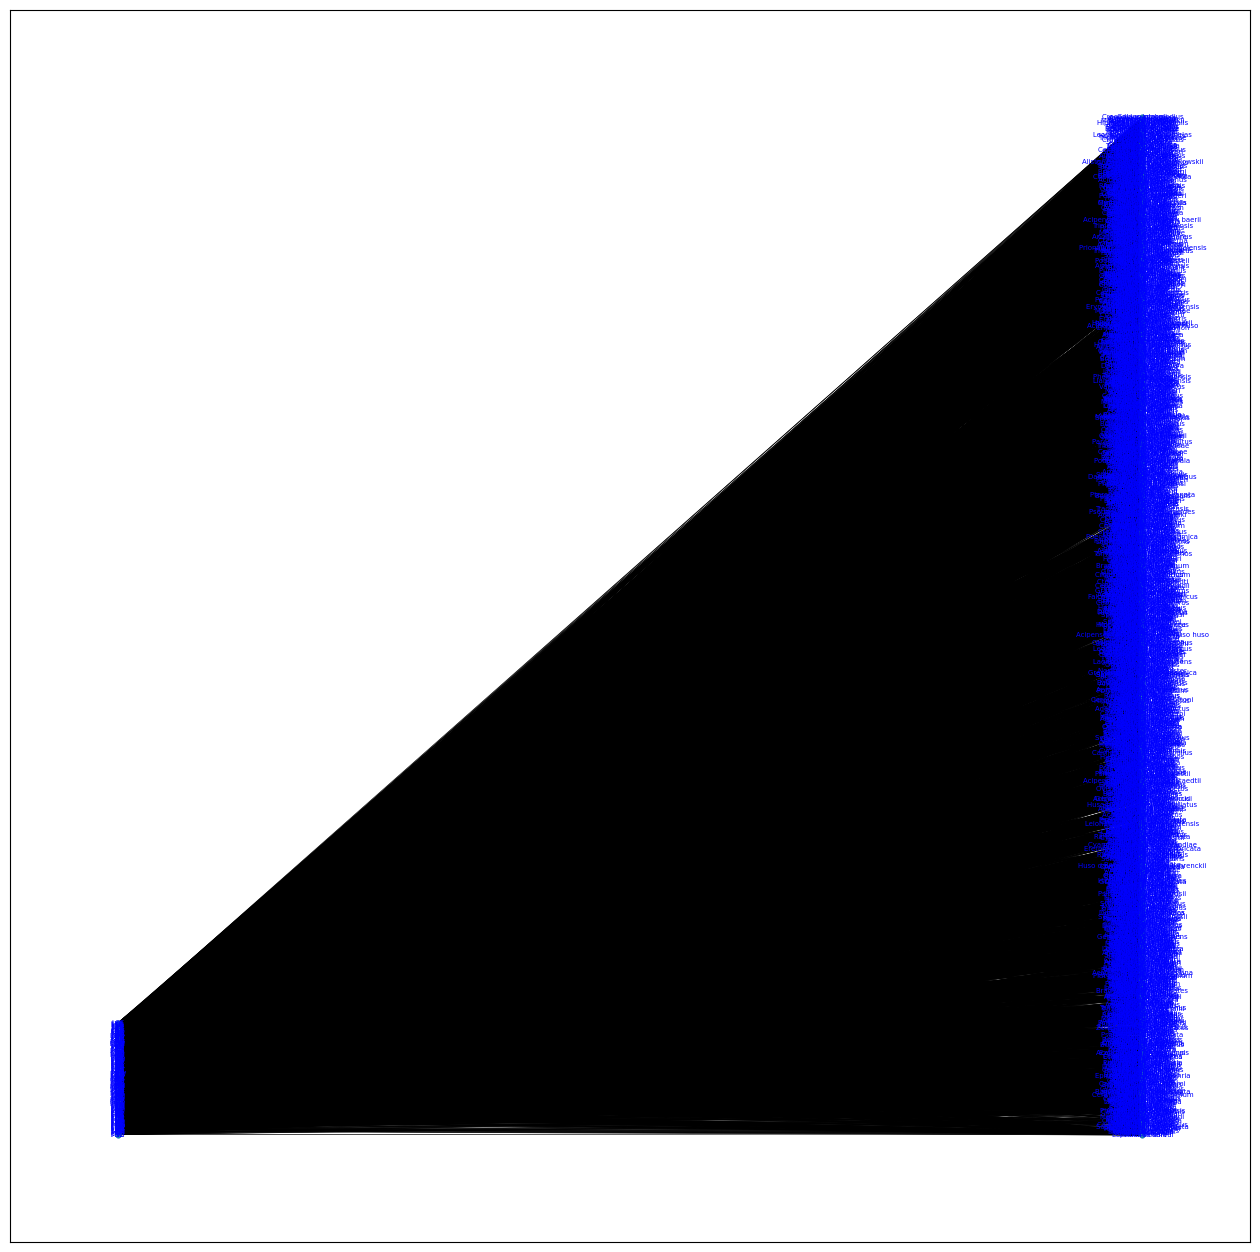

In [8]:
IT.add_nodes_from(df.Importer, type="Importer")
IT.add_nodes_from(df.Taxon, type="Taxon")
IT.add_edges_from(importer_taxon_edges.edges)

nodes = IT.nodes()
nodes_0  = set([n for n in nodes if  IT.nodes[n]['type']=="Importer"])
nodes_1  = set([n for n in nodes if  IT.nodes[n]['type']=="Taxon"])

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(nodes_0) )
pos.update( (n, (2, i)) for i, n in enumerate(nodes_1) )
fig = plt.figure(figsize=(16,16))
nx.draw_networkx(IT, pos=pos, node_size=10, with_labels=True, font_color="blue", font_size=5, width=0.5)

nx.write_gml(IT, "importer-taxon.gml")

Number of nodes:  2001
Number of edges:  13825

Average degree: 13.818090954522738
Minimum degree:  1
Maximum degree:  747
[1.00000000e+00 1.59903872e+00 2.55692482e+00 4.08862177e+00
 6.53786451e+00 1.04542985e+01 1.67168280e+01 2.67308552e+01
 4.27436724e+01 6.83487870e+01 1.09292357e+02 1.74762710e+02
 2.79452339e+02 4.46855109e+02 7.14538620e+02 1.14257492e+03
 1.82702153e+03 2.92147816e+03 4.67155668e+03 7.47000000e+03]
[4.97215066e-01 1.51299342e-01 1.04080829e-01 3.16266200e-02
 2.30962078e-02 9.41640505e-03 5.78898114e-03 3.40182262e-03
 1.05394985e-03 2.07499058e-04 1.29764874e-04 8.11518027e-05
 2.68678417e-05 3.73388801e-06 1.16754146e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


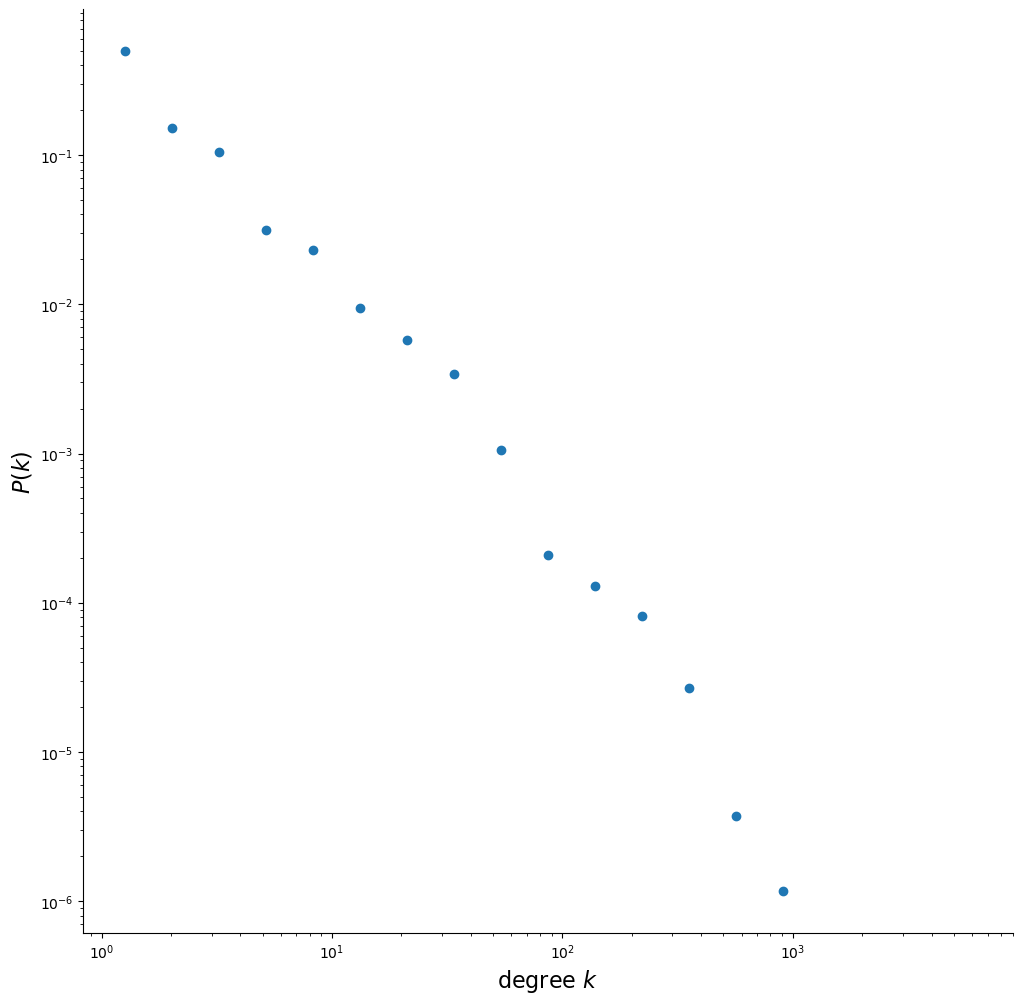

In [9]:
degrees = [IT.degree[node] for node in IT]
print("Number of nodes: ", IT.number_of_nodes())
print("Number of edges: ", IT.number_of_edges())
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

plot_degree_dist(IT)

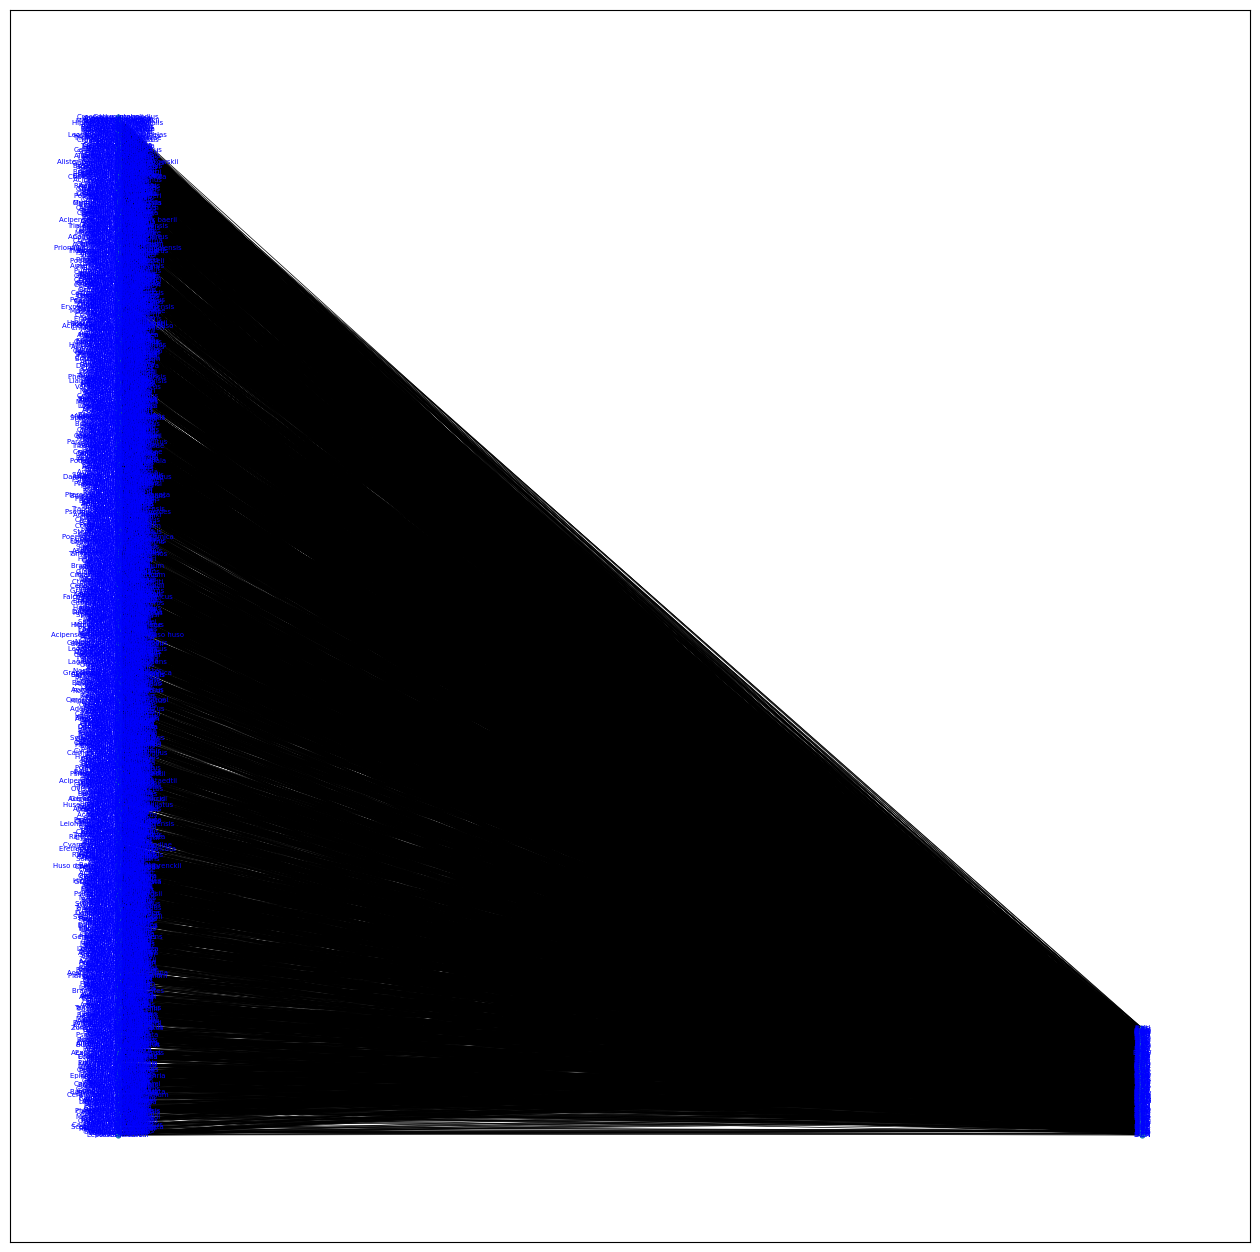

In [10]:
TE.add_nodes_from(df.Exporter, type="Exporter")
TE.add_nodes_from(df.Taxon, type="Taxon")
TE.add_edges_from(taxon_exporter_edges.edges)

nodes = TE.nodes()
nodes_2  = set([n for n in nodes if  TE.nodes[n]['type']=="Exporter"])
nodes_3  = set([n for n in nodes if  TE.nodes[n]['type']=="Taxon"])

pos = dict()
pos.update( (n, (2, i)) for i, n in enumerate(nodes_2) )
pos.update( (n, (1, i)) for i, n in enumerate(nodes_3) )
fig = plt.figure(figsize=(16,16))
nx.draw_networkx(TE, pos=pos, node_size=10, with_labels=True, font_color="blue", font_size=5, width=0.5)

nx.write_gml(TE, "taxon-exporter.gml")

Number of nodes:  1992
Number of edges:  7012

Average degree: 7.040160642570281
Minimum degree:  1
Maximum degree:  480
[1.00000000e+00 1.56224642e+00 2.44061388e+00 3.81284031e+00
 5.95659613e+00 9.30567100e+00 1.45377512e+01 2.27115498e+01
 3.54810375e+01 5.54301239e+01 8.65955127e+01 1.35283530e+02
 2.11346211e+02 3.30174862e+02 5.15814496e+02 8.05829352e+02
 1.25890402e+03 1.96671830e+03 3.07249863e+03 4.80000000e+03]
[6.83931702e-01 2.04034046e-01 7.82886242e-02 4.75369580e-02
 2.81801733e-02 9.40291146e-03 3.99208784e-03 1.76908910e-03
 5.53618170e-04 2.09402310e-04 7.21749708e-05 4.61994790e-05
 2.53478279e-05 2.70420717e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


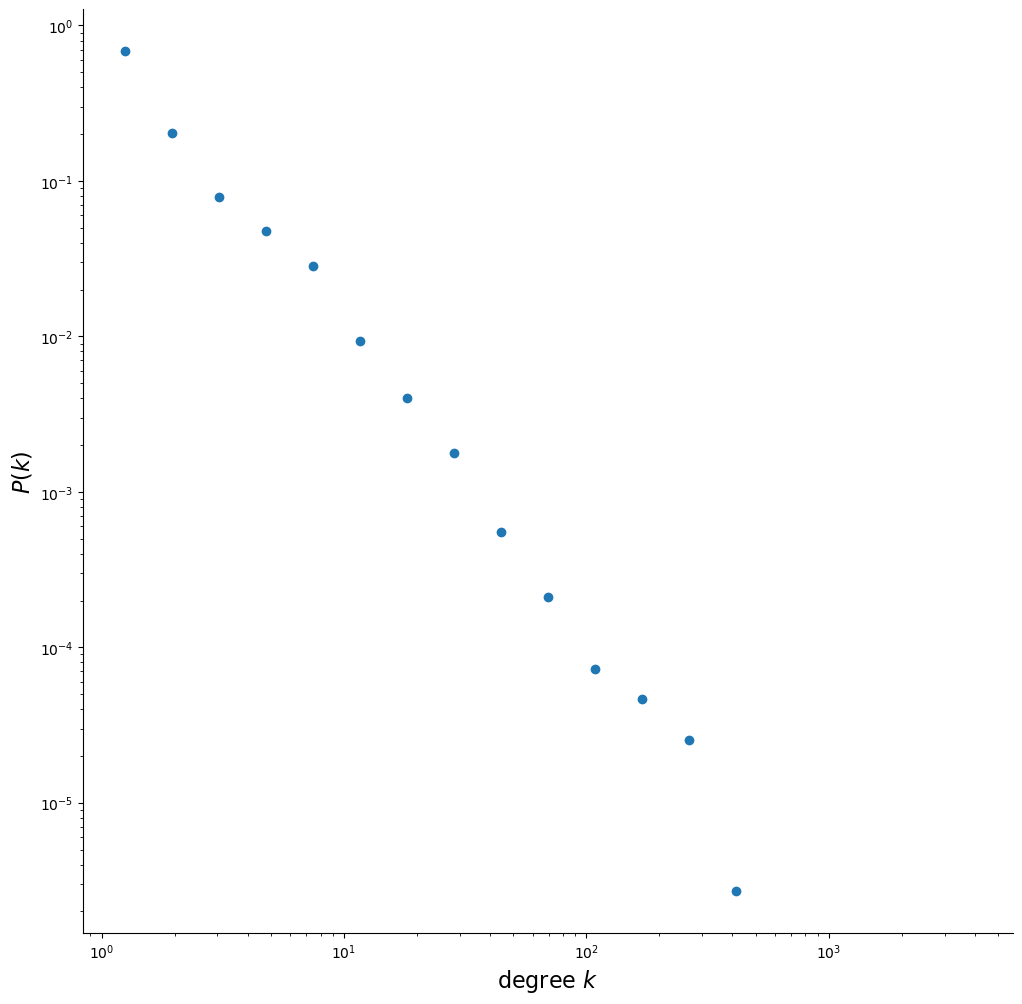

In [11]:
degrees = [TE.degree[node] for node in TE]
print("Number of nodes: ", TE.number_of_nodes())
print("Number of edges: ", TE.number_of_edges())
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

plot_degree_dist(TE)

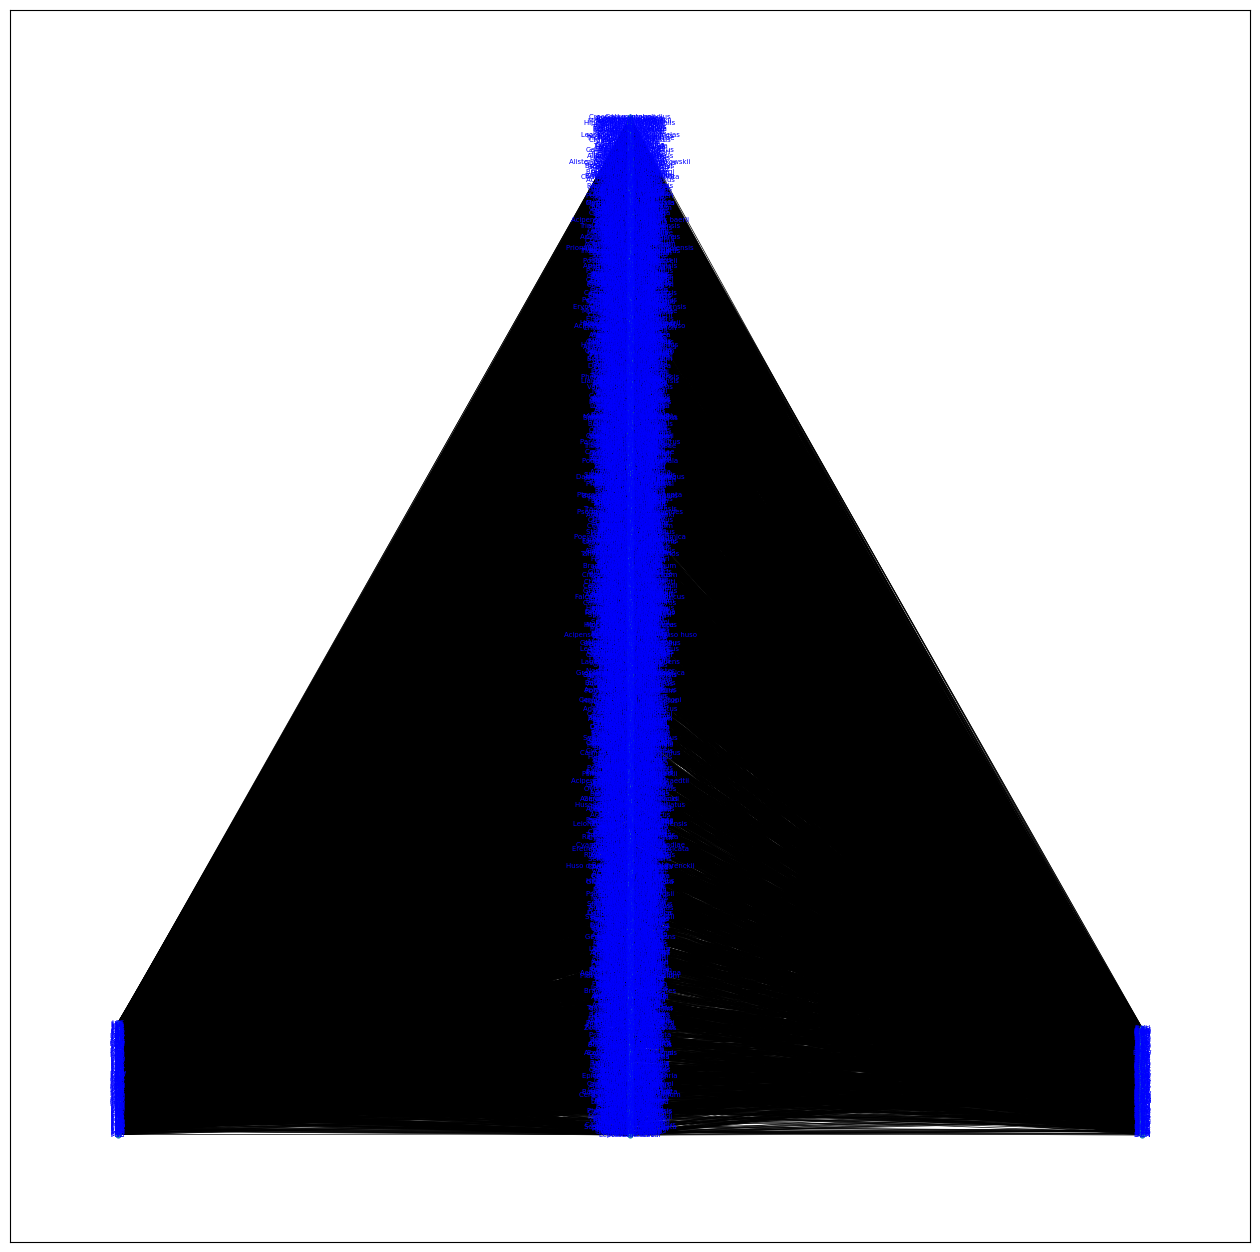

In [12]:
F = nx.compose(IT,TE)

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(nodes_0) )
pos.update( (n, (2, i)) for i, n in enumerate(nodes_1) )
pos.update( (n, (3, i)) for i, n in enumerate(nodes_2) ) 
fig = plt.figure(figsize=(16,16))
nx.draw_networkx(F, pos=pos, node_size=10, with_labels=True, font_color="blue", font_size=5, width=0.5)
nx.write_gml(F, "tripartite.gml")

Number of nodes:  2191
Number of edges:  20837

Average degree: 19.020538566864445
Minimum degree:  1
Maximum degree:  747
[1.00000000e+00 1.59903872e+00 2.55692482e+00 4.08862177e+00
 6.53786451e+00 1.04542985e+01 1.67168280e+01 2.67308552e+01
 4.27436724e+01 6.83487870e+01 1.09292357e+02 1.74762710e+02
 2.79452339e+02 4.46855109e+02 7.14538620e+02 1.14257492e+03
 1.82702153e+03 2.92147816e+03 4.67155668e+03 7.47000000e+03]
[3.27620589e-02 2.65398795e-01 1.05186372e-01 4.60280681e-02
 3.19313571e-02 1.50132617e-02 6.79102180e-03 3.99041361e-03
 1.97858119e-03 4.79336361e-04 1.81253453e-04 1.13351510e-04
 3.27172075e-05 5.11513686e-06 1.06629414e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


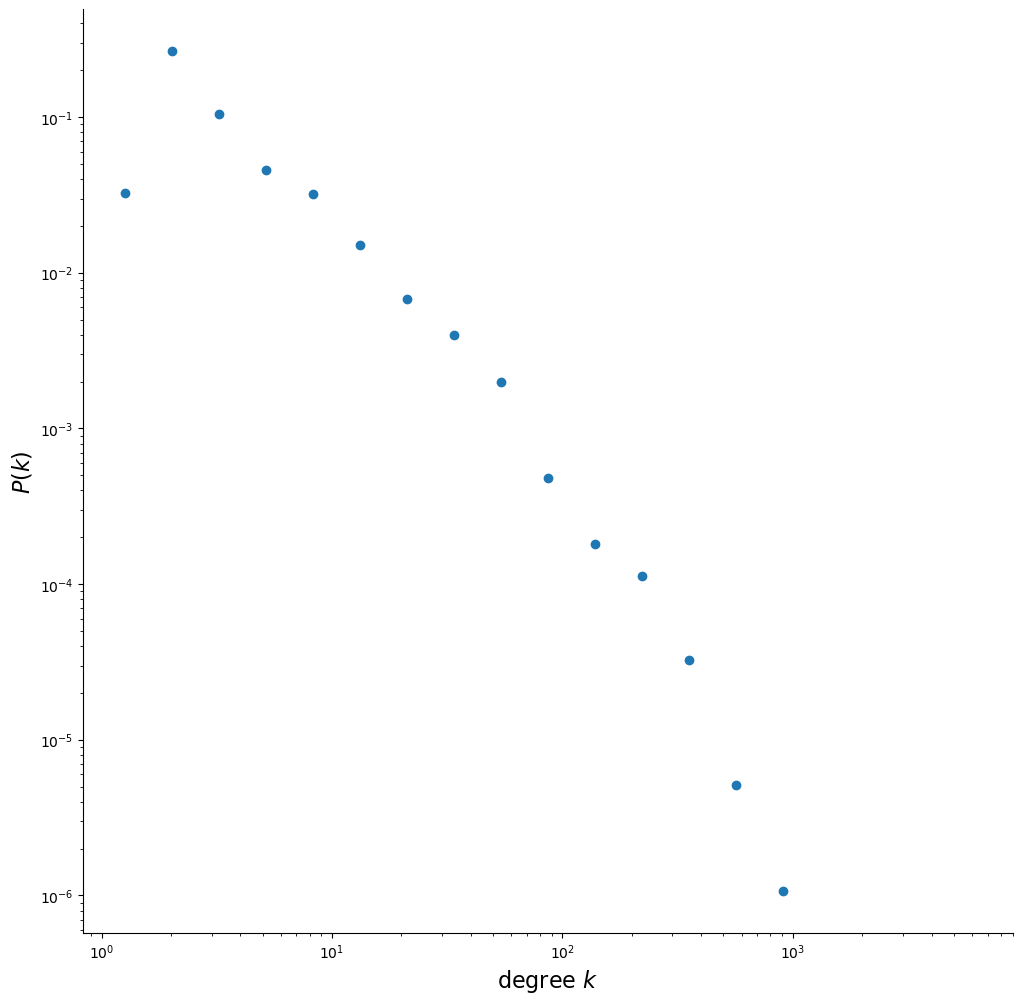

In [13]:
degrees = [F.degree[node] for node in F]
print("Number of nodes: ", F.number_of_nodes())
print("Number of edges: ", F.number_of_edges())
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
plot_degree_dist(F)